#Exploring Movie Body Counts

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
os.getcwd()

#Import Data

In [2]:
df = pd.read_csv('http://files.figshare.com/1332945/film_death_counts.csv')

In [3]:
df.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating
0,24 Hour Party People,2002,7,R,Biography|Comedy|Drama|Music,Michael Winterbottom,117,7.3
1,28 Days Later,2002,53,R,Horror|Sci-Fi|Thriller,Danny Boyle,113,7.6
2,28 Weeks Later,2007,212,R,Horror|Sci-Fi|Thriller,Juan Carlos Fresnadillo,100,7.0
3,30 Days of Night,2007,67,R,Horror|Thriller,David Slade,113,6.6
4,300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7


##Rename Columns

Lets rename the columns for analysis purposes and add a count column for pivoting and a boudy count per minute

In [4]:
df.columns = ['Film', 'Year', 'Body count', 'MPAA', 'Genre', 'Director', 'Minutes', u'IMDB']
df['Film count'] = 1
df['Body count/min'] = df['Body count'] / df['Minutes'].astype(float)
df.head()

,Film,Year,Body count,MPAA,Genre,Director,Minutes,IMDB,Film count,Body count/min
0,24 Hour Party People,2002,7,R,Biography|Comedy|Drama|Music,Michael Winterbottom,117,7.3,1,0.059829
1,28 Days Later,2002,53,R,Horror|Sci-Fi|Thriller,Danny Boyle,113,7.6,1,0.469027
2,28 Weeks Later,2007,212,R,Horror|Sci-Fi|Thriller,Juan Carlos Fresnadillo,100,7.0,1,2.120000
3,30 Days of Night,2007,67,R,Horror|Thriller,David Slade,113,6.6,1,0.592920
4,300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7,1,5.128205


##Lets Visualize the evolution of body counts over time

In [5]:
group_year = df.groupby('Year').agg([np.mean, np.median, sum])
group_year.tail()

Body count                   Minutes                    IMDB          \
            mean  median   sum        mean  median   sum      mean  median   
Year                                                                         
2007   85.312500    45.5  4095  114.062500   111.0  5475  6.829167    7.00   
2008   68.653846    37.0  1785  109.615385   108.5  2850  6.573077    6.65   
2009   55.000000    59.0   605  112.272727   110.0  1235  6.845455    6.60   
2010  129.750000   126.0   519  115.750000   111.0   463  7.250000    7.25   
2013  156.000000   156.0   156  119.000000   119.0   119  6.500000    6.50   

             Film count               Body count/min                       
        sum        mean  median  sum            mean    median        sum  
Year                                                                       
2007  327.8           1       1   48        0.749838  0.366966  35.992220  
2008  170.9           1       1   26        0.635468  0.371208  16.522174  
2009   75.3           1       1   11        0.518937  0.385621   5.708305  
2010   29.0           1       1    4        1.132110  1.005280   4.528441  
2013    6.5           1       1    1        1.310924  1.310924   1.310924

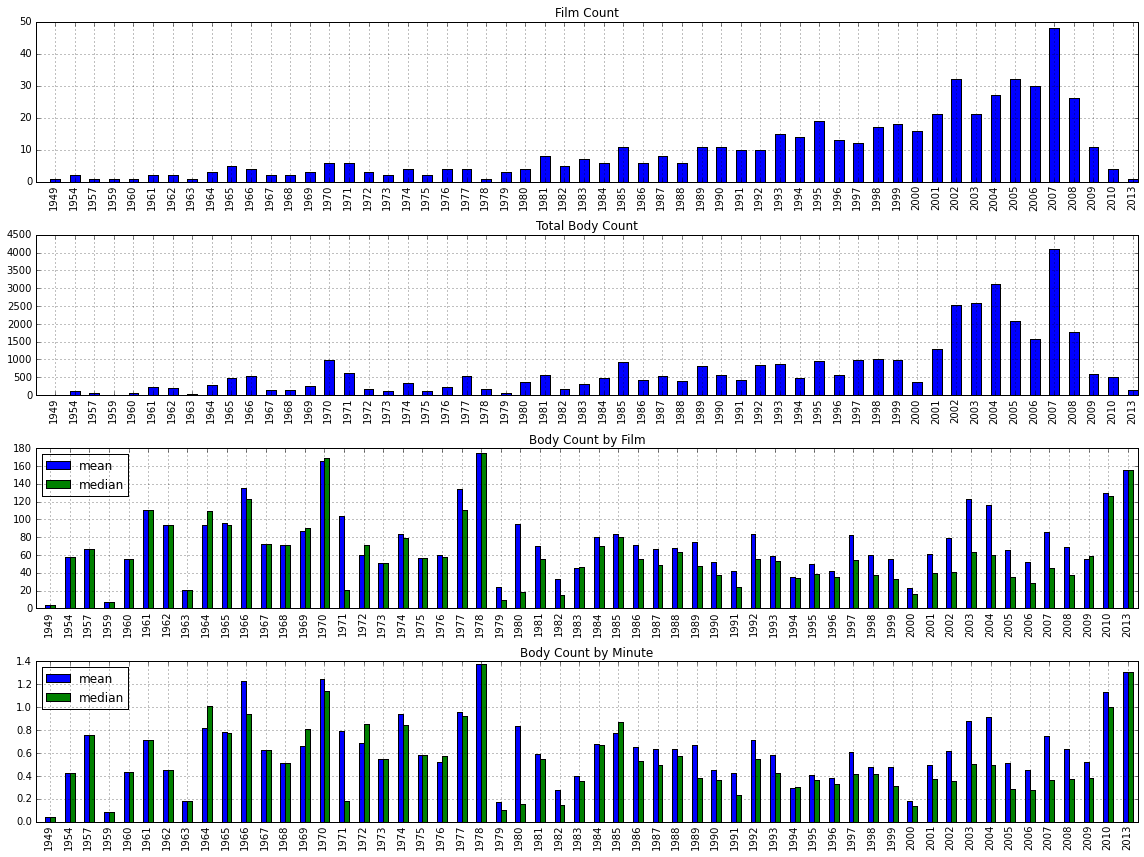

In [14]:
df_bc = pd.DataFrame({'mean': group_year['Body count']['mean'],
                      'median': group_year['Body count']['median']})

df_bc_min = pd.DataFrame({'mean': group_year['Body count/min']['mean'], 
                          'median': group_year['Body count/min']['median']})

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(16, 12))


group_year['Film count']['sum'].plot(kind='bar', ax=axes[0]); axes[0].set_title('Film Count')
group_year['Body count']['sum'].plot(kind='bar', ax=axes[1]); axes[1].set_title('Total Body Count')
df_bc.plot(kind='bar', ax=axes[2]); axes[2].set_title('Body Count by Film')
df_bc_min.plot(kind='bar', ax=axes[3]); axes[3].set_title('Body Count by Minute')

for i in range(4):
    axes[i].set_xlabel('', visible=False)
    fig.tight_layout() 


What we can safely say is, that most films in our dataset are from 2007. What this also shows quite well is the selection bias. There is only one film reviewed for each of the years 1978 and 2013, both have a pretty high body count.

#Lets Identify the bloodiest movies

Use the set_index function to maintain a column as the unique identifier. This is very useful for plotting and summary purposes.

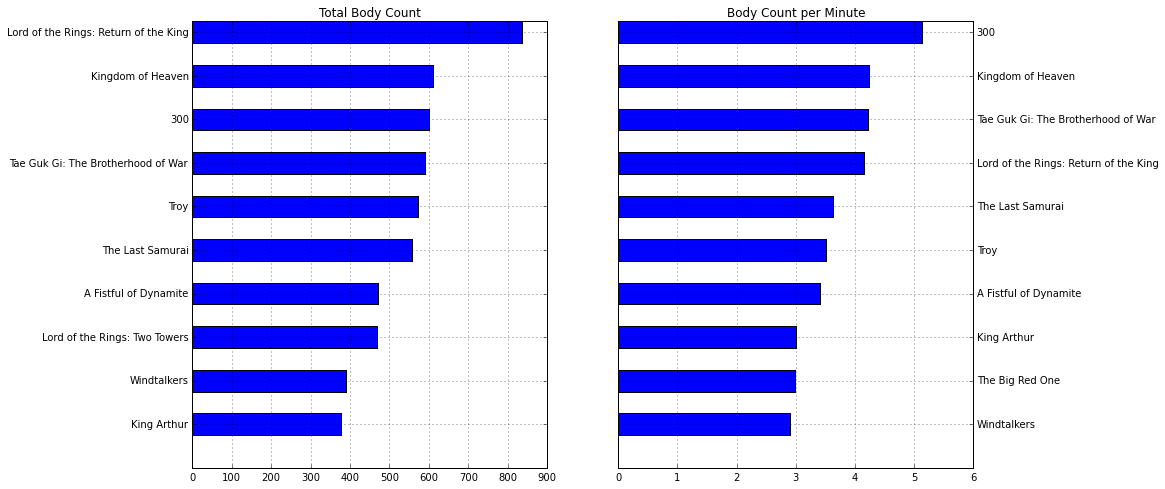

In [15]:
df_film = df.set_index('Film') #keeps film name as the 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

bc = df_film.sort('Body count')['Body count'].tail(10)
bc.plot(kind='barh', ax=axes[0])
axes[0].set_title('Total Body Count')

bc_min = df_film.sort('Body count/min')['Body count/min'].tail(10)
bc_min.plot(kind='barh', ax=axes[1])
axes[1].set_title('Body Count per Minute')
axes[1].yaxis.set_ticks_position('right')

for i in range(2):
    axes[i].set_ylabel('', visible=False)
    
    #http://nbviewer.ipython.org/github/yaph/ipython-notebooks/blob/master/Exploring%20Movie%20Body%20Counts.ipynb
    


##Most violent directors

Now let's look at directors. As you may have noticed above the Genre column can contain multiple values separated by | characters. This also applies to the Director column, here are some examples.

In [20]:
df[df['Director'].apply(lambda x: -1 != x.find('|'))].head()

,Film,Year,Body count,MPAA,Genre,Director,Minutes,IMDB,Film count,Body count/min
26,Aliens vs. Predator: Requiem,2007,5,R,Action|Horror|Sci-Fi|Thriller,Colin Strause|Greg Strause,94,4.7,1,0.053191
38,Aqua Teen Hunger Force Colon Movie Film for Th...,2007,67,R,Animation|Action|Adventure,Matt Maiellaro|Dave Willis,86,6.8,1,0.779070
46,Bangkok Dangerous,2008,38,R,Action|Crime|Thriller,Oxide Pang Chun|Danny Pang,99,5.4,1,0.383838
47,Barton Fink,1991,3,R,Drama|Mystery,Joel Coen|Ethan Coen,116,7.7,1,0.025862
83,City of God,2002,60,R,Crime|Drama,Fernando Meirelles|Katia Lund,130,8.7,1,0.461538
